# REVEALING AND PREVENTING FRAUDLENT TRANSACTION USING MACHINE-LEARNING

Our idea is to use open-source Credit Card Transaction data and to develop a Machine Learning Model that can learn from patterns of abnormal transactions and classify the credit card transactions as fraudulent or fair. The final goal is to generate the best possible results for detecting Credit.

# Importing the Dependencies
NumPy : a Python library used for numerical operations, particularly with arrays.

Pandas: a Python library used for data manipulation and analysis.

scikit-learn: a popular Python library for machine learning, which includes a variety of tools for classification, regression,                 clustering, and more.

train_test_split: a function from scikit-learn that splits a dataset into training and testing sets.

LogisticRegression: a class from scikit-learn that implements logistic regression, a popular classification algorithm.

accuracy_score: a function from scikit-learn that calculates the accuracy of a classification model by comparing its predictions 				 to the true labels.

We will be using these several libraries and uses them to build and evaluate a logistic regression model for a binary classification task.

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

# loading the dataset to a Pandas DataFrame

This code reads a CSV (comma-separated values) file called "creditcard.csv" into a Pandas DataFrame object named "credit_card_data".

"read_csv()" is a function provided by Pandas for reading CSV files into a DataFrame Object.

In [16]:
credit_card_data = pd.read_csv("creditcard.csv")

# First 5 rows of the dataset

This code calls the 'head()' method on a Pandas DataFrame object called "credit_card_data", which displays the first five rows of the DataFrame.


In [17]:
credit_card_data.head()

,Transaction_time,Transaction_id,Merchant_name,Merchant_category,Credit_limit,Transaction_currency,Merchant_location_city,Merchant_location_state,Merchant_location_country,Merchant_location_zipcode,...,Decline_reason,Refund_status,Transaction_category,Interest_rate,Late_payment_fees,Minimum_payment_due,Total_balance,Card_usage_frequency,Transaction_Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# last 5 rows of the dataset

This code calls the 'tail()' method on a Pandas DataFrame object called "credit_card_data", which displays the last five rows of the DataFrame.

In [18]:
credit_card_data.tail()

,Transaction_time,Transaction_id,Merchant_name,Merchant_category,Credit_limit,Transaction_currency,Merchant_location_city,Merchant_location_state,Merchant_location_country,Merchant_location_zipcode,...,Decline_reason,Refund_status,Transaction_category,Interest_rate,Late_payment_fees,Minimum_payment_due,Total_balance,Card_usage_frequency,Transaction_Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# dataset informations

This code calls the 'info()' method on a Pandas DataFrame object called "credit_card_data", which displays information about the DataFrame, including the column names, data types, and non-null values for each column.

In [19]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Transaction_time           284807 non-null  float64
 1   Transaction_id             284807 non-null  float64
 2   Merchant_name              284807 non-null  float64
 3   Merchant_category          284807 non-null  float64
 4   Credit_limit               284807 non-null  float64
 5   Transaction_currency       284807 non-null  float64
 6   Merchant_location_city     284807 non-null  float64
 7   Merchant_location_state    284807 non-null  float64
 8   Merchant_location_country  284807 non-null  float64
 9   Merchant_location_zipcode  284807 non-null  float64
 10  Terminal_id                284807 non-null  float64
 11  Card_type                  284807 non-null  float64
 12  Card_network               284807 non-null  float64
 13  Card_issuer                28

# Checking the number of missing values in each column

This code calls the 'isnull()' method on a Pandas DataFrame object called "credit_card_data", which returns a DataFrame of the same shape as "credit_card_data" but with boolean values indicating whether each element is null or not.

The 'sum()' method is then called on this DataFrame to count the number of null values in each column.

In [20]:
credit_card_data.isnull().sum()

Transaction_time             0
Transaction_id               0
Merchant_name                0
Merchant_category            0
Credit_limit                 0
Transaction_currency         0
Merchant_location_city       0
Merchant_location_state      0
Merchant_location_country    0
Merchant_location_zipcode    0
Terminal_id                  0
Card_type                    0
Card_network                 0
Card_issuer                  0
Card_type_detail             0
Card_number                  0
Cardholder_name              0
Card_expiration_date         0
Card_cvv                     0
Authorization_code           0
Transaction_status           0
Decline_reason               0
Refund_status                0
Transaction_category         0
Interest_rate                0
Late_payment_fees            0
Minimum_payment_due          0
Total_balance                0
Card_usage_frequency         0
Transaction_Amount           0
Class                        0
dtype: int64

# Distribution of legit transactions & fraudulent transactions

This code calls the 'value_counts()' method on the "Class" column of a Pandas DataFrame object called "credit_card_data",which returns a count of number of unique values in a column of a DataFrame.

In this object class having '0' is considered as "legit" and '1' is considered as "fraudulent".


In [21]:
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

# Countplot visualization of the 'Class' column

This code uses the Seaborn library to create a countplot visualization of the 'Class' column in the "credit_card_data" DataFrame.

countplot() is a function provided by Seaborn for creating a countplot visualization, which shows the count of observations in each category of a categorical variable. In this case, x='Class' specifies the column to use for the countplot, and data="credit_card_data" specifies the DataFrame to use for the data.

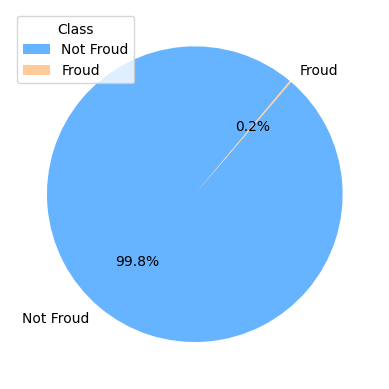

In [22]:

plt.pie(credit_card_data['Class'].value_counts(),labels=['Not Froud','Froud'],autopct='%1.1f%%', startangle=50 ,colors =['#66b3ff','#ffcc99']
)

plt.legend(title = "Class")
plt.show() 

# separating the data for analysis

This code creates two new DataFrames named "legit" and "fraud" by filtering rows from the "credit_card_data" DataFrame based on the value of the 'Class' column.

credit_card_data: The original Pandas DataFrame object containing credit card transaction data.

Class: Refers to a specific column in the credit_card_data DataFrame that contains a binary label indicating whether each 			   transaction is fraudulent (1) or legitimate (0).

Legit: A new DataFrame containing only the rows from credit_card_data where the 'Class' column is equal to 0 (legitimate transactions).

Fraud: A new DataFrame containing only the rows from credit_card_data where the 'Class' column is equal to 1 (fraudulent transactions).

In [23]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

#  countplot visualization of legitimate and fraudulent

This code creates a countplot visualization using Seaborn and Matplotlib, with additional annotations and formatting.

Seaborn: 	A Python library for creating statistical visualizations.

Matplotlib: A Python library for creating visualizations.

countplot():A function provided by Seaborn for creating a countplot visualization, which shows the count of observations in 				 each category of a categorical variable. In this case, x='Class' specifies the column to use for the countplot, and 

data=credit_card_data specifies the DataFrame to use for the data.

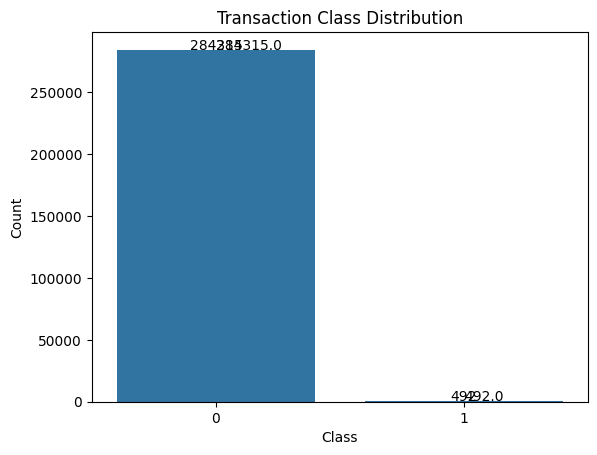

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# create countplot
ax = sns.countplot(x='Class', data=credit_card_data)

# add value labels to each bar
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+50))
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 10, '{:.0f}'.format(p.get_height()), ha='center')

# set title and axis labels
ax.set_title("Transaction Class Distribution")
ax.set_xlabel("Class")
ax.set_ylabel("Count")

# display plot
plt.show()


# Transaction times for legitimate transactions and Fraudulent transactions.
This code creates a figure with two subplots showing the distribution of transaction times for legitimate transactions and fraudulent transactions.

First two lines of the code defines two variables, fraud and legit, which contain subsets of the "credit_card_data" dataframe. The "fraud" subset contains all rows where the Class column is 1 (indicating fraud), and the "legit" subset contains all rows where the Class column is 0 (indicating legitimate).

Following Next code creates a figure with a size of 20 by 30 inches and sets the title to "Fraud and Legit time distribution". Then, it creates a 5x2 grid of subplots and selects the first subplot for plotting the distribution of legitimate transaction times. It uses the sns.histplot() function from the Seaborn library to create a histogram of transaction times for the not_froud subset of data, with the Transaction_time column on the x-axis and the count of transactions on the y-axis.

The second subplot shows the distribution of fraudulent transaction times, and is created using the same "sns.histplot()" function but with the fraud subset of data and a different color ('#FF7F50', which is a shade of orange) for the bars.
Finally, the "plt.show()" function is called to display the figure.

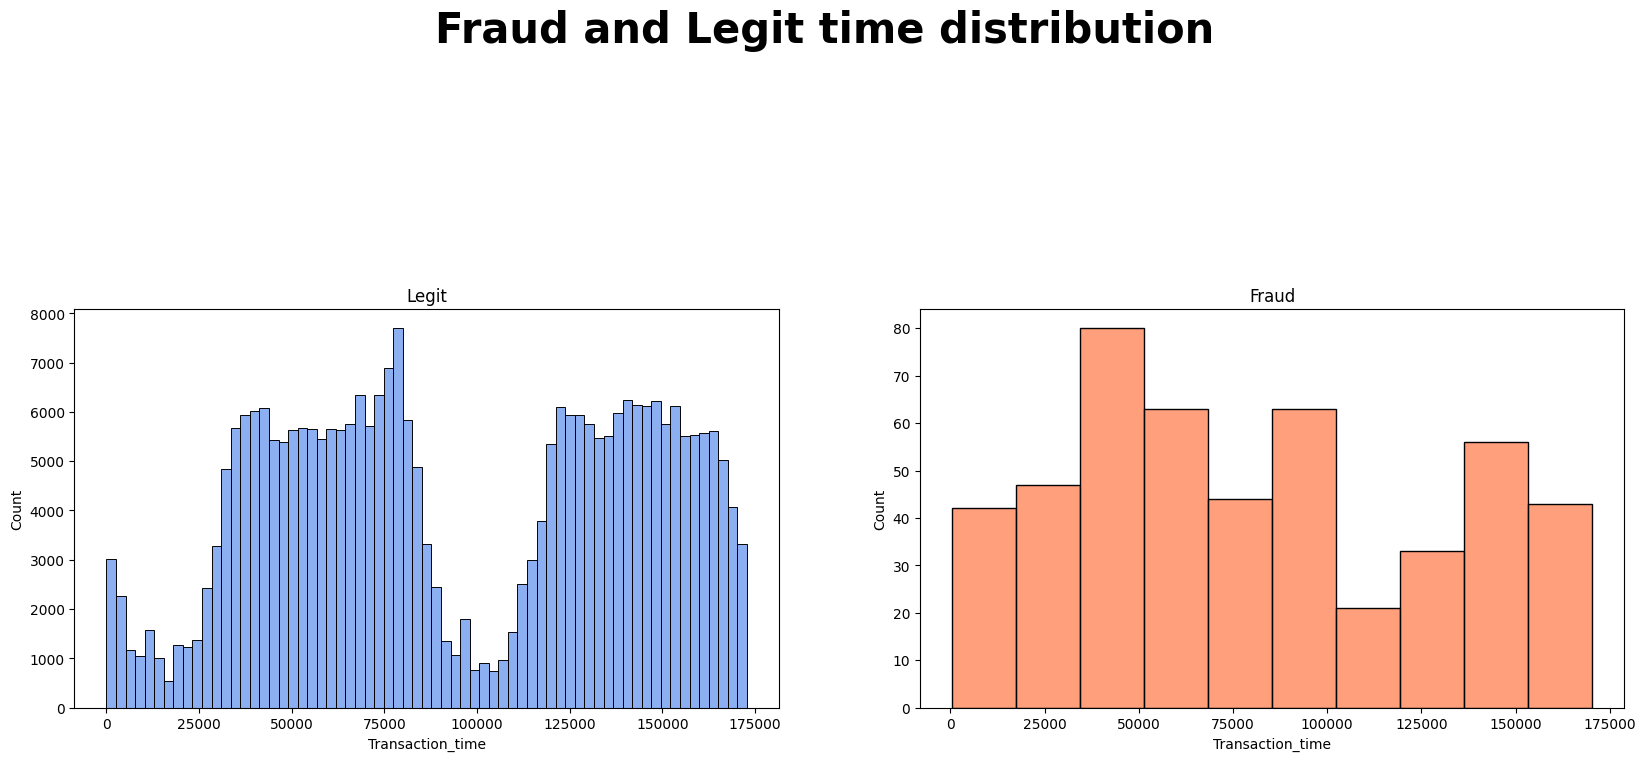

In [25]:
froud=fraud
not_froud=legit

plt.figure(figsize = (20, 30))
plt.suptitle("Fraud and Legit time distribution",fontweight="bold", fontsize=30)
plt.subplot(5,2,1)
plt.title('Legit')
sns.histplot(data = not_froud, x = "Transaction_time",color='#6495ED')
plt.subplot(5,2,2)
plt.title('Fraud')
sns.histplot(data = froud, x = "Transaction_time" , color='#FF7F50')
plt.show()

# Dimensions of the legit and fraud DataFrames.

This code prints the dimensions of the legit and fraud DataFrames.

shape is a property of a Pandas DataFrame object that returns a tuple representing the dimensions of the DataFrame as (number of rows, number of columns).

In this case, the output of print(legit.shape) will display the number of rows and columns in the legit DataFrame, and the output of print(fraud.shape) will display the number of rows and columns in the fraud DataFrame.

In [26]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


# Statistical measures of the data

This code uses the Pandas 'describe()' method to generate summary statistics of a DataFrame or Series object, including count, mean, standard deviation, minimum, maximum, and various quartile values.

In [27]:
legit.Transaction_Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Transaction_Amount, dtype: float64

This code uses the Pandas 'describe()' method to generate summary statistics of a DataFrame or Series object, including count, mean, standard deviation, minimum, maximum, and various quartile values.

In [28]:
fraud.Transaction_Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Transaction_Amount, dtype: float64

# Compare the values for both transactions

This code groups the credit_card_data DataFrame by the 'Class' column and computes the mean of all other numeric columns for each group using the mean() method.

'groupby()' is a method provided by Pandas that groups a DataFrame by a specified column and returns a DataFrameGroupBy object.

'mean()' is a method provided by Pandas that calculates the mean of all numeric columns in a DataFrameGroupBy object.

In this case, the output of this code will be a DataFrame containing the mean values of all numeric columns in the "credit_card_data" DataFrame for the 'Class' groups (0 and 1).

In [29]:
credit_card_data.groupby('Class').mean()

,Transaction_time,Transaction_id,Merchant_name,Merchant_category,Credit_limit,Transaction_currency,Merchant_location_city,Merchant_location_state,Merchant_location_country,Merchant_location_zipcode,...,Transaction_status,Decline_reason,Refund_status,Transaction_category,Interest_rate,Late_payment_fees,Minimum_payment_due,Total_balance,Card_usage_frequency,Transaction_Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Creation of New DataFrame

This code uses the Pandas 'sample()' method to randomly select 492 rows from the legit DataFrame.

In this case, the output of this code will be a new DataFrame called "legit_sample" that contains a random sample of 492 rows from the 'legit' DataFrame.

In [30]:
legit_sample = legit.sample(n=492)

# Concatenating two DataFrames

This code uses the Pandas "concat()" function to concatenate the 'legit_sample' and fraud DataFrames along the row axis (axis=0) into a new DataFrame called "new_dataset".

In this case, the output of this code will be a new DataFrame called 'new_dataset' that contains all the rows from the 'legit_sample' DataFrame and all the rows from the 'fraud' DataFrame concatenated together along the row axis. This new DataFrame will have 984 rows (492 from legit_sample and 492 from fraud) and the same columns as the original "credit_card_data" DataFrame.

In [31]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [32]:
#new_dataset.to_csv('new_dataset.csv', index=False)

#  countplot visualization of New_dataset

This code creates a countplot using the Seaborn library to visualize the class distribution in the "new_dataset" DataFrame.

In this case, the output of this code will be a visualization showing the count of observations in each class (0 or 1) in the "new_dataset" DataFrame. The for loop adds value labels to each bar, and the set_title(), set_xlabel(), and set_ylabel() methods are used to set the title and axis labels for the plot. Finally, the show() method is called to display the plot.

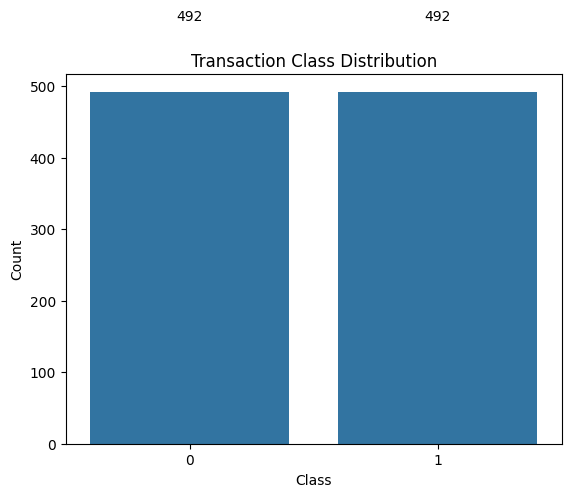

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# create countplot
ax = sns.countplot(x='Class', data=new_dataset)

# add value labels to each bar
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+50))
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 100, '{:.0f}'.format(p.get_height()), ha='center')

# set title and axis labels
ax.set_title("Transaction Class Distribution")
ax.set_xlabel("Class")
ax.set_ylabel("Count")

# display plot
plt.show()


# First 5 rows of the new_dataset

This code will display the first 5 rows of the new_dataset DataFrame using the head() method.

'head()' is a method provided by Pandas that returns the first five rows of a DataFrame.

In [34]:
new_dataset.head()

,Transaction_time,Transaction_id,Merchant_name,Merchant_category,Credit_limit,Transaction_currency,Merchant_location_city,Merchant_location_state,Merchant_location_country,Merchant_location_zipcode,...,Decline_reason,Refund_status,Transaction_category,Interest_rate,Late_payment_fees,Minimum_payment_due,Total_balance,Card_usage_frequency,Transaction_Amount,Class
105802,69696.0,-1.286582,0.941692,1.122363,-0.141952,0.289447,1.814709,0.069485,1.088226,-0.469838,...,0.040443,0.335878,0.062454,-0.990358,-0.334453,0.341421,0.147261,0.070824,49.64,0
52203,45325.0,-2.046553,-1.746646,-0.647864,-3.183871,0.762677,3.375304,-0.652632,1.154123,-2.408970,...,-0.367297,-0.999542,-0.240074,0.990465,-0.073717,-0.543470,0.444575,-0.313144,285.70,0
275731,166696.0,-1.286750,1.568141,0.165630,-1.341318,0.987416,-0.503428,1.831608,-1.017585,2.009392,...,-0.772318,-0.525678,-0.105351,-0.444628,-0.306794,-0.015679,-0.295694,-1.079851,9.99,0
198575,132549.0,2.043280,-1.077389,-1.528241,-0.798701,-0.679526,-1.039628,-0.345865,-0.232917,-0.501336,...,0.643468,1.757124,-0.206263,0.089984,0.364157,0.268546,-0.065382,-0.075808,80.00,0
160138,113134.0,1.887735,-0.266571,-1.753481,-0.271507,1.354194,1.738279,-0.253206,0.458175,0.439270,...,0.407784,1.463008,0.060495,-1.117376,0.090818,-0.313201,0.073564,-0.075976,1.00,0


# Last 5 rows of the new_dataset

This code will display the Last 5 rows of the new_dataset DataFrame using the tail() method.

'tail()' is a method provided by Pandas that returns the Last five rows of a DataFrame.

In [35]:
new_dataset.tail()

,Transaction_time,Transaction_id,Merchant_name,Merchant_category,Credit_limit,Transaction_currency,Merchant_location_city,Merchant_location_state,Merchant_location_country,Merchant_location_zipcode,...,Decline_reason,Refund_status,Transaction_category,Interest_rate,Late_payment_fees,Minimum_payment_due,Total_balance,Card_usage_frequency,Transaction_Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


# Count of each unique value in the 'Class' column of the new_dataset

This code will return the count of each unique value in the 'Class' column of the new_dataset DataFrame using the 'value_counts()' method.

"value_counts()" is a method provided by Pandas that returns a Series containing counts of unique values in a DataFrame.

In this case, the output of this code will be a Series object with two values: the count of transactions with a class of 0 and the count of transactions with a class of 1 in the 'new_dataset' DataFrame. Since we combined 492 legitimate transactions with 492 fraudulent transactions in the new_dataset DataFrame, the output should be equal to Series([492, 492]).

In [36]:
new_dataset['Class'].value_counts()


Class
0    492
1    492
Name: count, dtype: int64

# comparing the average values of each variable between the two classes

This code will group the 'new_dataset' DataFrame by the 'Class' column and calculate the mean of each column for each group using the 'groupby()' and 'mean()' methods.

The output of this code will be a DataFrame with two rows, one for each class (0 or 1) in the 'new_dataset' DataFrame. 

The columns in the output will be the same as the columns in the input DataFrame (new_dataset), and the values will be the mean of each column for each class. This can be useful for comparing the average values of each variable between the two classes.

In [37]:
new_dataset.groupby('Class').mean()

,Transaction_time,Transaction_id,Merchant_name,Merchant_category,Credit_limit,Transaction_currency,Merchant_location_city,Merchant_location_state,Merchant_location_country,Merchant_location_zipcode,...,Transaction_status,Decline_reason,Refund_status,Transaction_category,Interest_rate,Late_payment_fees,Minimum_payment_due,Total_balance,Card_usage_frequency,Transaction_Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95178.174797,-0.025522,-0.008783,-0.004810,-0.030775,0.061958,0.003280,-0.048557,0.028960,0.010655,...,0.031852,-0.022992,0.023117,0.041521,0.045106,-0.031273,0.020292,0.019960,0.003488,82.159228
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [38]:
new_dataset.shape

(984, 31)

In [39]:
#new_dataset.to_csv('1_transactions.csv', index=False)

# Splitting the data into Features & Targets

In this code, we are preparing the data for training a machine learning model.

"new_dataset.drop(columns='Class', axis=1)" will create a new DataFrame X that contains all columns of new_dataset except for the 'Class' column. This is done using the 'drop()' method provided by Pandas, which takes the columns to be dropped as a list and the axis parameter (in this case, axis=1 means that we want to drop columns).

"new_dataset['Class']" will create a Pandas Series 'Y' that contains only the 'Class' column of new_dataset.

By doing this, we are separating the input features (stored in X) from the output/target variable (stored in Y). This is a common practice in supervised learning tasks, where we use the input features to predict the output variable. In this case, we will use X and Y to train a machine learning model to predict whether a transaction is fraudulent or not.

In [40]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

# Feature for each transaction in the dataset('X')


In [41]:
X.shape

(984, 30)

This will print the 'X' DataFrame, which contains all columns of 'new_dataset' except for the 'Class' column. Each row in 'X' corresponds to a transaction and each column represents a feature or attribute of that transaction. By printing 'X', you can see the values of each feature for each transaction in the dataset.

In [42]:
print(X)

        Transaction_time  Transaction_id  Merchant_name  Merchant_category  \
105802           69696.0       -1.286582       0.941692           1.122363   
52203            45325.0       -2.046553      -1.746646          -0.647864   
275731          166696.0       -1.286750       1.568141           0.165630   
198575          132549.0        2.043280      -1.077389          -1.528241   
160138          113134.0        1.887735      -0.266571          -1.753481   
...                  ...             ...            ...                ...   
279863          169142.0       -1.927883       1.125653          -4.518331   
280143          169347.0        1.378559       1.289381          -5.004247   
280149          169351.0       -0.676143       1.126366          -2.213700   
281144          169966.0       -3.113832       0.585864          -5.399730   
281674          170348.0        1.991976       0.158476          -2.583441   

        Credit_limit  Transaction_currency  Merchant_location_c

# Class of each transaction in the dataset('Y')

This will print the 'Y' Pandas Series, which contains only the 'Class' column of "new_dataset". Each element in 'Y' corresponds to the class of a transaction - whether it is a legitimate transaction (0) or a fraudulent transaction (1).

By printing 'Y', you can see the class of each transaction in the dataset. This is the target variable that we want to predict using the input features in 'X'.

In [43]:
print(Y)

105802    0
52203     0
275731    0
198575    0
160138    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


# Split the data into Training data & Testing Data

This code uses the "train_test_split" function from 'scikit-learn' to split the data into training and testing sets.

'X' and 'Y' are the input features and target variable, respectively, which were defined previously. "test_size=0.2" indicates that we want to reserve 20% of the data for testing, while using the remaining 80% for training.

"stratify=Y" ensures that the classes are evenly represented in both the training and testing sets, as it preserves the same proportion of classes as the original dataset.

"random_state=2" sets the seed for the random number generator to ensure reproducibility.

The resulting variables X_train, X_test, Y_train, and Y_test contain the training and testing sets of input features and target variable, respectively.

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Verifying the split data for Training data & Testing Data

This code helps to verify that the data was split correctly and that the dimensions of the training and testing sets match our expectations.

In this code 'X' is the input features dataframe and 'Y' is the target variable series, this code prints the shapes of 'X', "X_train", and "X_test".

"X.shape" returns the shape of the original input features dataframe, which should be a tuple containing the number of rows and columns in the dataframe. 

"X_train.shape" and "X_test.shape" should return tuples containing the number of rows and columns in the training and testing input features dataframes, respectively.

In [45]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [47]:
#X_train.to_csv('Training_dataset.csv', index=False)

In [48]:
#X_test.to_csv('Testing_dataset.csv', index=False)

# Logistic Regression :
It is a statistical model used in ML that is used to predict the probability of a binary outcome based on one or more input variables. 
In simple terms, it is a technique that can be used to predict a "yes" or "no" answer based on given input variables. 
For example, it can use historical data on weather patterns, river water levels, and other environmental factors to predict the likelihood of a flood occurring in a certain area.

# K-Nearest Neighbors(KNN) :
It is a ML algorithm used for classification or regression tasks, where the output is a class membership or a real value, respectively. 
In simple terms, it works by finding the K closest data points in the training dataset to a new input data point, and then assigning the label of the majority class among those K nearest neighbors to the new data point. 
For example, it can be used to classify whether an email is spam or not based on the similarity between its content and the content of previously labeled emails.

# Naïve Bayes(NB) :
Naive Bayes is a machine learning algorithm based on Bayes' theorem that is commonly used for classification problems. 
In simple terms, Naive Bayes works by calculating the probability of a new data point belonging to each possible class based on its input features, and then predicting the class with the highest probability.
For example, it can be used to classify an email as spam or not based on the frequency of certain words in the email.

# Support Vector Machine(SVM) :
SVM is a machine learning algorithm that can be used for both classification and regression tasks. 
In simple terms, SVM works by finding the hyperplane that best separates the data into different classes. The hyperplane is chosen in such a way that the distance between it and the closest data points from each class is maximized
For example, it can be used to classify whether a tumor is benign or malignant based on the characteristics of the tumor such as size, shape, and texture.

# Initializing the model and fitting the model to the training data 

This code creates a logistic regression classifier and fits the model into training data,

In this code, it creates a logistic regression classifier using the "LogisticRegression()" function from 'scikit-learn', and sets the "max_iter" hyperparameter to 1000. 

The "max_iter" parameter controls the maximum number of iterations allowed for the solver to converge to a solution. If the solver has not converged after "max_iter" iterations, it will stop and return the best solution found so far.

After initializing the model, the code then fits the model to the training data using the "fit()" method of the model object, which takes in the input and target data as arguments. 

The "fit()" method updates the coefficients of the logistic regression model to minimize the logistic loss function on the training data.

In [49]:
model = LogisticRegression(max_iter=1500)
model.fit(X_train, Y_train)


c:\Users\MY DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1500)

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [51]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [52]:
from sklearn.svm import SVC

svm = SVC(kernel="linear", C=1)
svm.fit(X_train, Y_train)

SVC(C=1, kernel='linear')

# Model Evaluation based on Accuracy Score for the Training data

This code trains a logistic regression model on a given dataset, and then calculates the accuracy of the model's predictions on the training set.

In this code, the logistic regression model is trained on the training set "(X_train, Y_train)" using the "fit()" method. Then, the model predicts the output values for the training set using the "predict()" method and stores them in "X_train_prediction".

The accuracy of the model is then calculated using the "accuracy_score()" function, which takes the predicted values and the actual values of the output as input and returns the accuracy score. 

In [53]:
X_train_prediction = model.predict(X_train)
accuracy_log = accuracy_score(X_train_prediction, Y_train)
print('Accuracy of logistic regression : ', accuracy_log)

Accuracy of logistic regression :  0.9491740787801779


In [54]:
X_pred_knn = knn.predict(X_train)
accuracy_knn = accuracy_score(X_pred_knn, Y_train,)
print("Accuracy o:", accuracy_knn)

Accuracy o: 0.7674714104193139


In [55]:
X_pred_nb = nb.predict(X_train)
accuracy_nb = accuracy_score(X_pred_nb, Y_train)
print("Accuracy of Naive Bayes :", accuracy_nb)

Accuracy of Naive Bayes : 0.8627700127064803


In [56]:
X_pred_svm = svm.predict(X_train)
accuracy_svm = accuracy_score(X_pred_svm, Y_train)
print("Accuracy of SVM :", accuracy_svm)

Accuracy of SVM : 0.9034307496823379


# Countplot to compare Original Accuracy and Predicted Accuracy for the Training data

This code creates a bar plot to compare the original accuracy and the predicted accuracy of the logistic regression model based on Training data.

The bar plot is created using the "matplotlib.pyplot" module.

The 'x' and 'y' variables contain the data to be plotted, and the colors variable specifies the colours of the bars.

The "plt.bar" function creates the bar plot, and the "plt.title", "plt.xlabel", and "plt.ylabel" functions are used to set the plot title and axis labels.

The for loop is used to display the accuracy values on top of each bar. Finally, the plot is displayed using the "plt.show" function.

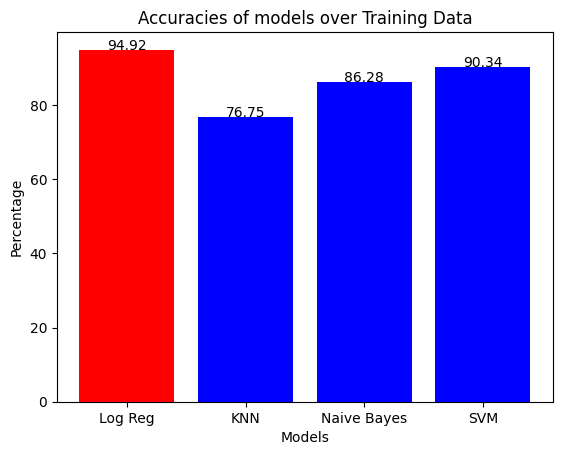

In [57]:
import matplotlib.pyplot as plt

# create data
x = ['Log Reg','KNN','Naive Bayes','SVM',]
y = [accuracy_log*100,accuracy_knn*100,accuracy_nb*100,accuracy_svm*100]
colors = ['red','blue','blue','blue']

# create bar plot
plt.bar(x, y,color=colors)

# set title and axis labels
plt.title("Accuracies of models over Training Data")
plt.xlabel("Models")
plt.ylabel("Percentage")

for i, v in enumerate(y):
    plt.text(i, v+0.01, str(round(v, 2)), ha='center')
# display plot
plt.show()


# Model Evaluation based on Accuracy Score for the Testing data

This code tests the data on a Trained logistic regression model , and then calculates the accuracy of the model's predictions on the test data.

The code above is predicting the class labels for the test data using the trained logistic regression model, and then computing the accuracy score of the predicted labels against the actual labels of the test data.

The predict method of the LogisticRegression object is called on "X_test" to get the predicted labels for the test data, which are then compared against the actual labels "Y_test" using the 'accuracy_score' function from the sklearn.metrics module.

The computed accuracy score is then printed to the console. This provides a measure of how well the model is performing on new, unseen data.

In [58]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9086294416243654


In [59]:
X_test_knn = knn.predict(X_test)
accuracy_test_knn = accuracy_score(X_test_knn, Y_test)
print("Accuracy of KNN:", accuracy_test_knn)

Accuracy of KNN: 0.6700507614213198


In [60]:
X_test_nb = nb.predict(X_test)
accuracy_test_nb = accuracy_score(X_test_nb, Y_test)
print("Accuracy of Naive Bayes :", accuracy_test_nb)

Accuracy of Naive Bayes : 0.868020304568528


In [61]:
X_test_svm = svm.predict(X_test)
accuracy_test_svm = accuracy_score(X_test_svm, Y_test)
print("Accuracy of SVM :", accuracy_test_svm)

Accuracy of SVM : 0.9086294416243654


"\nfor i, v in enumerate(y):\n    plt.text(i, v+0.01, str(round(v, 2)), ha='center')\n# display plot\nplt.show()\n\n"

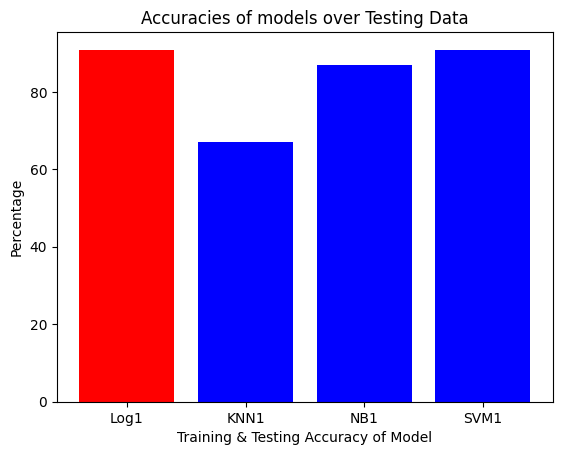

In [62]:
import matplotlib.pyplot as plt

# create data
x = ['Log1','KNN1','NB1','SVM1']
y = [test_data_accuracy*100,accuracy_test_knn*100,accuracy_test_nb*100,accuracy_test_svm*100]
colors = ['red','blue','blue','blue']

# create bar plot
plt.bar(x, y,color=colors)

# set title and axis labels
plt.title("Accuracies of models over Testing Data")
plt.xlabel("Training & Testing Accuracy of Model")
plt.ylabel("Percentage")

'''
for i, v in enumerate(y):
    plt.text(i, v+0.01, str(round(v, 2)), ha='center')
# display plot
plt.show()

'''

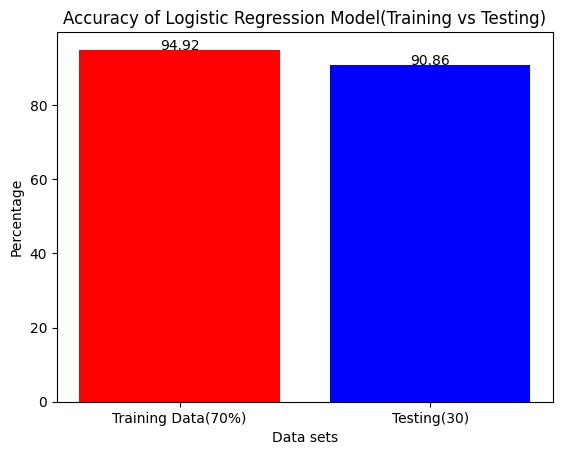

In [63]:
import matplotlib.pyplot as plt

# create data
x = ['Training Data(70%)','Testing(30)']
y = [accuracy_log*100,test_data_accuracy*100]
colors = ['red','blue']

# create bar plot
plt.bar(x, y,color=colors)

# set title and axis labels
plt.title("Accuracy of Logistic Regression Model(Training vs Testing)")
plt.xlabel("Data sets")
plt.ylabel("Percentage")

for i, v in enumerate(y):
    plt.text(i, v+0.01, str(round(v, 2)), ha='center')
# display plot
plt.show()


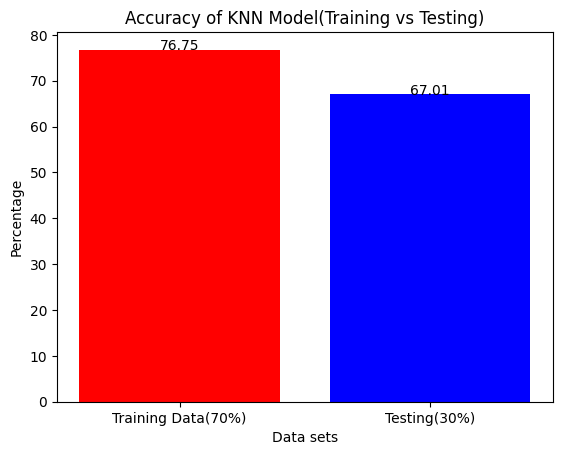

In [64]:
import matplotlib.pyplot as plt

# create data
x = ['Training Data(70%)','Testing(30%)']
y = [accuracy_knn*100,accuracy_test_knn*100]
colors = ['red','blue']

# create bar plot
plt.bar(x, y,color=colors)

# set title and axis labels
plt.title("Accuracy of KNN Model(Training vs Testing)")
plt.xlabel("Data sets")
plt.ylabel("Percentage")

for i, v in enumerate(y):
    plt.text(i, v+0.01, str(round(v, 2)), ha='center')
# display plot
plt.show()


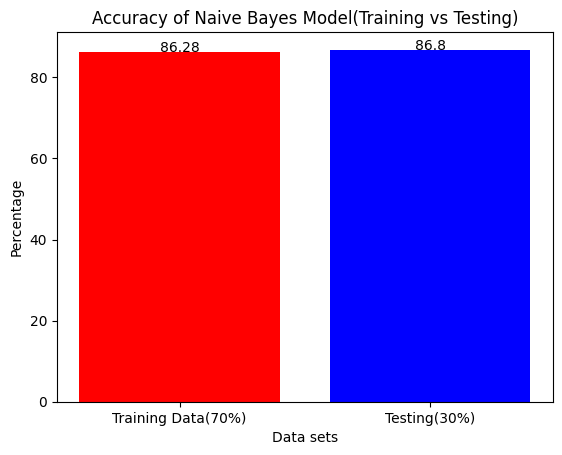

In [65]:
import matplotlib.pyplot as plt

# create data
x = ['Training Data(70%)','Testing(30%)']
y = [accuracy_nb*100,accuracy_test_nb*100]
colors = ['red','blue']

# create bar plot
plt.bar(x, y,color=colors)

# set title and axis labels
plt.title("Accuracy of Naive Bayes Model(Training vs Testing)")
plt.xlabel("Data sets")
plt.ylabel("Percentage")

for i, v in enumerate(y):
    plt.text(i, v+0.01, str(round(v, 2)), ha='center')
# display plot
plt.show()


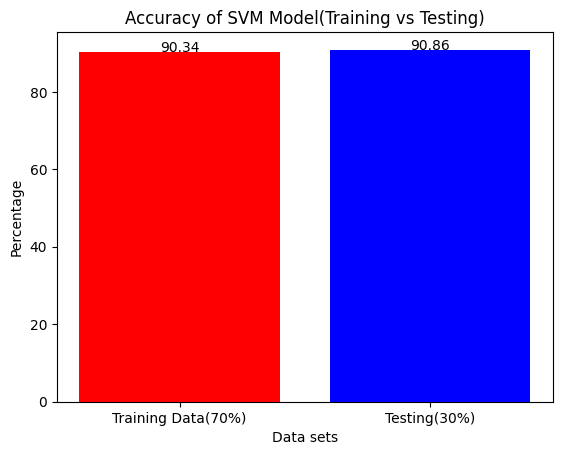

In [66]:
import matplotlib.pyplot as plt

# create data
x = ['Training Data(70%)','Testing(30%)']
y = [accuracy_svm*100,accuracy_test_svm*100]
colors = ['red','blue']

# create bar plot
plt.bar(x, y,color=colors)

# set title and axis labels
plt.title("Accuracy of SVM Model(Training vs Testing)")
plt.xlabel("Data sets")
plt.ylabel("Percentage")

for i, v in enumerate(y):
    plt.text(i, v+0.01, str(round(v, 2)), ha='center')
# display plot
plt.show()


# Accuracies of several machine learning models over Training and Testing

This code creates a bar plot showing the training and testing accuracies of several machine learning models.

The x-axis displays the name of each model, while the y-axis shows the percentage accuracy of each model. The color of the bars corresponds to the type of model: red bars represent logistic regression, while blue bars represent k-Nearest Neighbors (KNN), Naive Bayes (NB), and Support Vector Machines (SVM).

The height of each bar corresponds to the accuracy of the model, and the percentage value is displayed above each bar.

Overall, the plot allows us to compare the performance of different machine learning models on the same dataset, and to see how well each model performs on both the training and testing data.

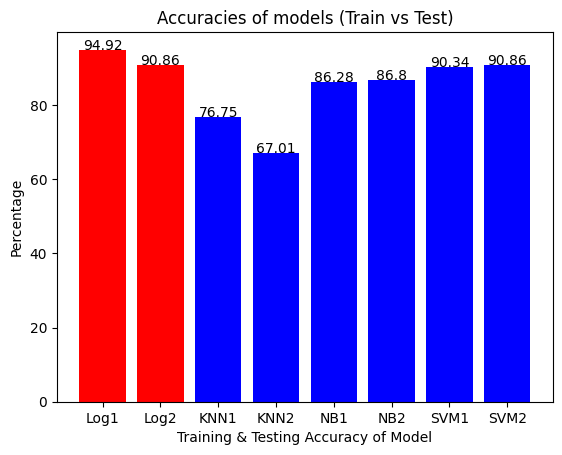

In [67]:
import matplotlib.pyplot as plt

# create data
x = ['Log1','Log2','KNN1','KNN2','NB1','NB2','SVM1','SVM2']
y = [accuracy_log*100,test_data_accuracy*100,accuracy_knn*100,accuracy_test_knn*100,accuracy_nb*100,accuracy_test_nb*100,accuracy_svm*100,accuracy_test_svm*100]
colors = ['red','red','blue','blue','blue','blue','blue','blue']

# create bar plot
plt.bar(x, y,color=colors)

# set title and axis labels
plt.title("Accuracies of models (Train vs Test)")
plt.xlabel("Training & Testing Accuracy of Model")
plt.ylabel("Percentage")

for i, v in enumerate(y):
    plt.text(i, v+0.01, str(round(v, 2)), ha='center')
# display plot
plt.show()


# ROC Curve of Logistic Regression Model 

Receiver Operating Characteristic of LR:
An ROC curve is a graph that summarizes the performance of a binary classification model by plotting the true positive rate against the false positive rate at various threshold settings. 
The AUC (Area Under the Curve) is a numerical measure of the ROC curve's performance, with a higher AUC indicating a better-performing model.


AUC of 0.98 suggests that the machine learning model has excellent performance in distinguishing between the positive and negative class labels

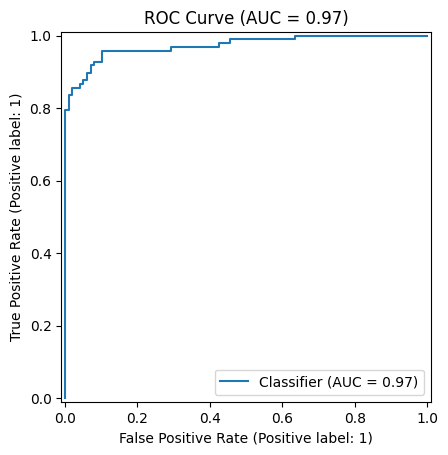

In [68]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt

# Assuming that you have trained a model and predicted probabilities for test data
probas = model.predict_proba(X_test)
y_true = Y_test

# calculate AUC score
auc_score = roc_auc_score(y_true, probas[:, 1])

# create ROC curve display object
roc_display = RocCurveDisplay.from_predictions(y_true, probas[:, 1])

# plot ROC curve with AUC score in the legend
#roc_display.plot()
plt.title('ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.show()


# Saving our model in Directory

The code saves a machine learning model as a .pkl file using the joblib library's dump() function. The model is saved in the current working directory with the name "fraud_detection_model.pkl".

The second line of code shows an example of specifying an additional parameter while saving the model. The "compress=True" parameter is used to enable compression of the .pkl file to save disk space. This can be useful for larger models that take up a lot of disk space.

In [69]:
import joblib
# Save the model as a .pkl file
joblib.dump(model, 'fraud_detection_model.pkl')

# You can also specify additional parameters such as compressing the .pkl file to save disk space
# For example, you can use 'compress' parameter with value True to enable compression
joblib.dump(model, 'fraud_detection_model.pkl', compress=True)

['fraud_detection_model.pkl']

# Principal Component Analysis (PCA)

In this code,

A string input "Revanth" is defined and it is converted to a list of characters using the list() method.

The list of characters is then one-hot encoded using the OneHotEncoder() method from the sklearn.preprocessing module. This converts each character to a binary feature vector where each position represents the presence or absence of a specific character.

Principal Component Analysis (PCA) is applied to the resulting feature data using the PCA() method from the sklearn.decomposition module. This reduces the dimensionality of the feature data by finding a single principal component that captures most of the variance in the data. And The resulting principal component is printed to the console.

In [74]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
import numpy as np

# Example input_string and conversion
input_string = "Revanth"
char_list = list(input_string)

# Convert the list of characters to a 2D array of binary features using one-hot encoding
encoder = OneHotEncoder(categories='auto')  # Remove sparse=False
features = encoder.fit_transform(np.array(char_list).reshape(-1, 1))

# Convert features to a dense array
features_dense = features.toarray()

# Apply PCA to the dense feature data and extract a single principal component
pca = PCA(n_components=1, svd_solver='full')
principal_component = pca.fit_transform(features_dense)

# Print the principal component
print(principal_component[0])


[0.]
